In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math_score']

In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [11]:
# Create Column transformer with 3 types of transfomers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [14]:
X.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "Adaboost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("MODEL performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-  Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print("--"*10)

    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-  Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)   
    print("*"*30)
    print("\n")   

Linear Regression
MODEL performance for Training set
- Root Mean Squared Error: 5.3231
-  Mean Absolute Error: 4.2667
-R2 Score: 0.8743
--------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
-  Mean Absolute Error: 4.2148
-R2 Score: 0.8804
******************************


Lasso
MODEL performance for Training set
- Root Mean Squared Error: 6.5938
-  Mean Absolute Error: 5.2063
-R2 Score: 0.8071
--------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
-  Mean Absolute Error: 5.1579
-R2 Score: 0.8253
******************************


Ridge
MODEL performance for Training set
- Root Mean Squared Error: 5.3233
-  Mean Absolute Error: 4.2650
-R2 Score: 0.8743
--------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
-  Mean Absolute Error: 4.2111
-R2 Score: 0.8806
******************************


K-Neighbours Regressor
MODEL performance for Training set
- Root Mean Squared Error: 5.7077
-  Mean Absolute Err

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,RandomForestRegressor,0.852730
7,CatBoosting Regressor,0.851632
8,Adaboost Regressor,0.848411
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.737711


In [29]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy: ", score)

Accuracy:  88.04332983749565


Text(0, 0.5, 'predicted')

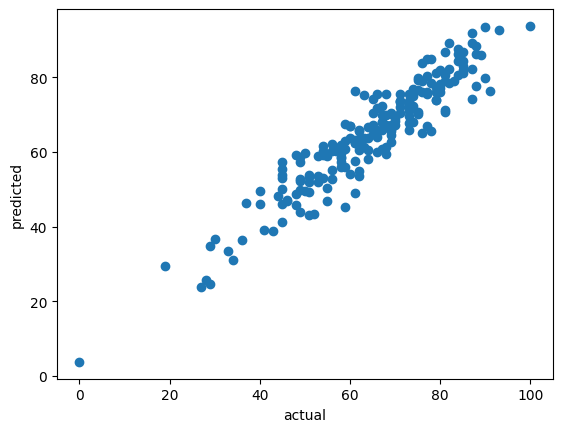

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

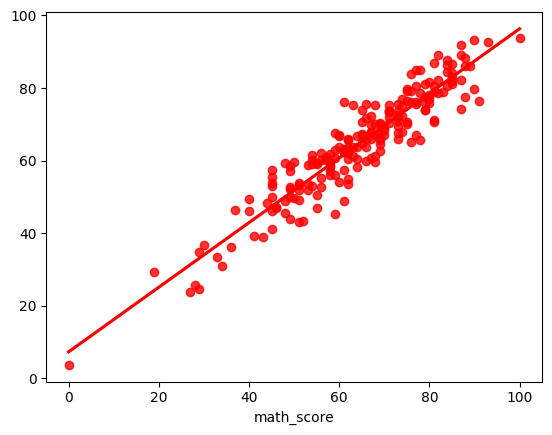

In [32]:
sns.regplot(x=y_test, y=y_pred, color='red', ci=None)